In [1]:
import pandas as pd
import numpy as np
import pytz
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, timezone
from sklearn.preprocessing import PowerTransformer

In [2]:
user_df = pd.read_csv('../data/users.csv')
user_df.head()

,user_id,birth_year,record_date,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals
0,user_0,1989,2019-01-13 05:15:15.599466,STANDARD,1.0,1.0,3,0,0
1,user_1,1975,2019-01-29 03:38:46.676876,STANDARD,NaN,NaN,21,0,0
2,user_2,1987,2019-01-18 19:17:31.229096,STANDARD,0.0,0.0,21,0,0
3,user_3,1994,2019-01-15 18:47:56.723104,STANDARD,1.0,0.0,0,0,0
4,user_4,1985,2019-01-11 00:36:46.673673,STANDARD,NaN,NaN,2,0,0


In [3]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19430 entries, 0 to 19429
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   user_id                                   19430 non-null  object 
 1   birth_year                                19430 non-null  int64  
 2   record_date                               19430 non-null  object 
 3   plan                                      19430 non-null  object 
 4   attributes_notifications_marketing_push   12820 non-null  float64
 5   attributes_notifications_marketing_email  12820 non-null  float64
 6   num_contacts                              19430 non-null  int64  
 7   num_referrals                             19430 non-null  int64  
 8   num_successful_referrals                  19430 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 1.3+ MB


In [4]:
trans_df = pd.read_csv('../data/trans.csv')
trans_df.head()

,record_date,user_id,cardholderpresence,trans_amount,trans_id,trans_state,trans_type_id
0,2019-04-03T03:34:21.784Z,user_898,NaN,4.55,transaction_0,COMPLETED,type_0
1,2020-03-19T06:15:59.537Z,user_1652,FALSE,15.50,transaction_1,COMPLETED,type_1
2,2020-03-18T18:53:41.323Z,user_1652,FALSE,43.40,transaction_2,COMPLETED,type_1
3,2020-03-22T14:20:01.513Z,user_1652,NaN,10043.01,transaction_3,COMPLETED,type_0
4,2020-03-22T05:42:50.316Z,user_5509,FALSE,43.81,transaction_4,COMPLETED,type_1


In [5]:
trans_df

,record_date,user_id,cardholderpresence,trans_amount,trans_id,trans_state,trans_type_id
0,2019-04-03T03:34:21.784Z,user_898,NaN,4.55,transaction_0,COMPLETED,type_0
1,2020-03-19T06:15:59.537Z,user_1652,FALSE,15.50,transaction_1,COMPLETED,type_1
2,2020-03-18T18:53:41.323Z,user_1652,FALSE,43.40,transaction_2,COMPLETED,type_1
3,2020-03-22T14:20:01.513Z,user_1652,NaN,10043.01,transaction_3,COMPLETED,type_0
4,2020-03-22T05:42:50.316Z,user_5509,FALSE,43.81,transaction_4,COMPLETED,type_1
...,...,...,...,...,...,...,...
1048571,2020-05-06T09:13:31.681Z,user_1189,NaN,4.26,transaction_1048572,COMPLETED,type_0
1048572,2020-05-04T13:49:32.291Z,user_631,NaN,21.28,transaction_1048573,COMPLETED,type_0
1048573,2020-05-05T09:21:37.971Z,user_1585,NaN,21.28,transaction_1048574,COMPLETED,type_0
1048574,2020-05-03T11:29:16.573Z,user_3296,FALSE,4.17,transaction_1048575,COMPLETED,type_1


In [6]:
trans_df['record_date'] = pd.to_datetime(trans_df['record_date'], utc=True)

In [7]:
user_df['record_date'] = pd.to_datetime(user_df['record_date'], utc=True)

In [8]:
last_day=trans_df['record_date'].max()

In [9]:
last_day

Timestamp('2020-05-14 21:38:40.194000+0000', tz='UTC')

In [10]:
user_df['user_days']=(last_day-user_df['record_date']).dt.days

In [11]:
user_df

,user_id,birth_year,record_date,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,user_days
0,user_0,1989,2019-01-13 05:15:15.599466+00:00,STANDARD,1.0,1.0,3,0,0,487
1,user_1,1975,2019-01-29 03:38:46.676876+00:00,STANDARD,NaN,NaN,21,0,0,471
2,user_2,1987,2019-01-18 19:17:31.229096+00:00,STANDARD,0.0,0.0,21,0,0,482
3,user_3,1994,2019-01-15 18:47:56.723104+00:00,STANDARD,1.0,0.0,0,0,0,485
4,user_4,1985,2019-01-11 00:36:46.673673+00:00,STANDARD,NaN,NaN,2,0,0,489
...,...,...,...,...,...,...,...,...,...,...
19425,user_19425,1994,2019-12-14 08:20:14.700048+00:00,STANDARD,1.0,1.0,17,0,0,152
19426,user_19426,1977,2019-12-28 05:37:36.863792+00:00,STANDARD,1.0,1.0,0,0,0,138
19427,user_19427,1991,2019-12-23 11:07:11.611503+00:00,STANDARD,1.0,1.0,13,0,0,143
19428,user_19428,1984,2019-12-03 14:09:34.164270+00:00,STANDARD,NaN,NaN,0,0,0,163


In [12]:
trans_df=trans_df.loc[trans_df.trans_state=='COMPLETED']

In [13]:
len(trans_df.user_id.unique())

9415

In [14]:
len(user_df.user_id.unique())

19428

In [15]:
types=trans_df.trans_type_id.unique()
n_types=len(types)
eps=0.000001

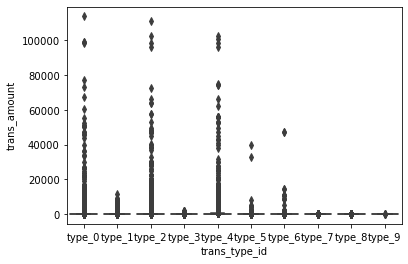

In [16]:
sns.boxplot(y='trans_amount', data=trans_df,x='trans_type_id')

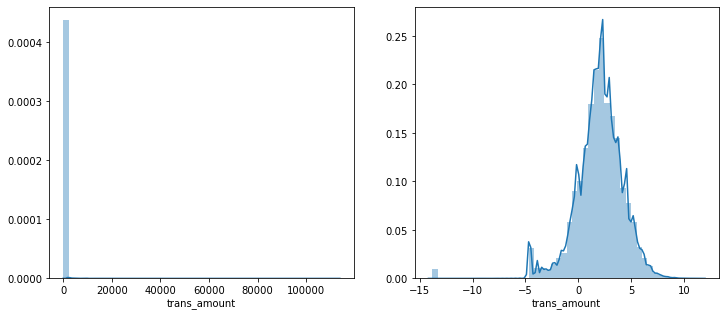

In [17]:
fig, ax=plt.subplots(ncols=2, figsize=(12,5))
sns.distplot(trans_df.trans_amount, ax=ax[0])
sns.distplot(np.log(trans_df.trans_amount+eps), ax=ax[1]);

/Users/lalehasadzadehesfahani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


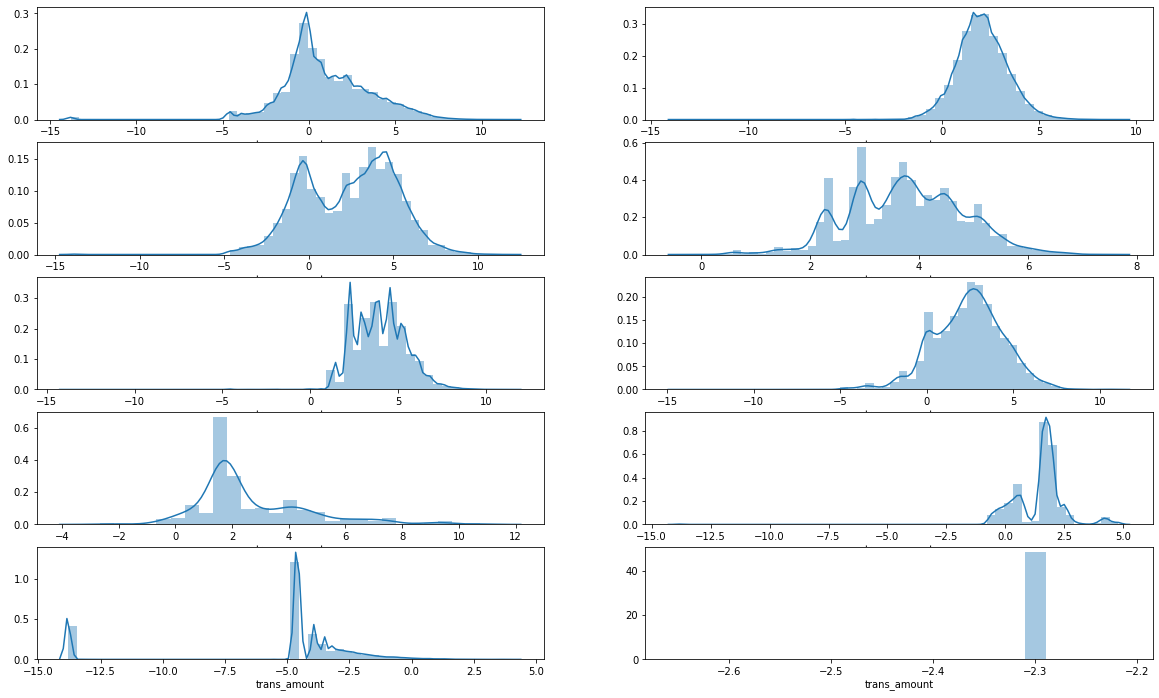

In [18]:
fig, ax=plt.subplots(ncols=np.int(n_types/5), nrows=5, figsize=(20,12))
for e in enumerate(types):
    sns.distplot(np.log(trans_df.loc[trans_df.trans_type_id==e[1], 'trans_amount']+eps), ax=ax[np.int(e[0]/2), np.int(e[0]%2)])
    

In [19]:
from scipy.stats import iqr

In [20]:
trans_df

,record_date,user_id,cardholderpresence,trans_amount,trans_id,trans_state,trans_type_id
0,2019-04-03 03:34:21.784000+00:00,user_898,NaN,4.55,transaction_0,COMPLETED,type_0
1,2020-03-19 06:15:59.537000+00:00,user_1652,FALSE,15.50,transaction_1,COMPLETED,type_1
2,2020-03-18 18:53:41.323000+00:00,user_1652,FALSE,43.40,transaction_2,COMPLETED,type_1
3,2020-03-22 14:20:01.513000+00:00,user_1652,NaN,10043.01,transaction_3,COMPLETED,type_0
4,2020-03-22 05:42:50.316000+00:00,user_5509,FALSE,43.81,transaction_4,COMPLETED,type_1
...,...,...,...,...,...,...,...
1048571,2020-05-06 09:13:31.681000+00:00,user_1189,NaN,4.26,transaction_1048572,COMPLETED,type_0
1048572,2020-05-04 13:49:32.291000+00:00,user_631,NaN,21.28,transaction_1048573,COMPLETED,type_0
1048573,2020-05-05 09:21:37.971000+00:00,user_1585,NaN,21.28,transaction_1048574,COMPLETED,type_0
1048574,2020-05-03 11:29:16.573000+00:00,user_3296,FALSE,4.17,transaction_1048575,COMPLETED,type_1


In [21]:
trans_df[['trans_type_id','trans_amount']].groupby('trans_type_id').describe()

trans_amount                                               \
                     count        mean          std   min    25%    50%   
trans_type_id                                                             
type_0            169715.0   70.666766   862.577957  0.00   0.60   1.70   
type_1            491184.0   20.513523    79.276388  0.00   3.40   7.56   
type_2             73267.0  192.517717  1460.246400  0.00   0.98  15.64   
type_3             29445.0   72.911605    95.029790  0.83  20.00  42.55   
type_4            118126.0  188.179155  1137.399929  0.00  17.90  50.00   
type_5              5353.0   76.457056   741.979953  0.00   2.94  12.20   
type_6               622.0  407.444196  2978.788439  0.07   4.99   6.80   
type_7              9254.0    7.721020    14.259221  0.00   1.99   5.10   
type_8             28578.0    0.101275     0.791175  0.00   0.01   0.01   
type_9               521.0    0.100019     0.001581  0.07   0.10   0.10   

                                   
                   75%        max  
trans_type_id                      
type_0          11.930  113857.61  
type_1          17.700   11618.57  
type_2          92.260  111091.19  
type_3          87.480    1703.83  
type_4         150.000  102471.85  
type_5          40.300   40000.00  
type_6          44.775   47024.18  
type_7           6.990     120.00  
type_8           0.030      57.47  
type_9           0.100       0.11

In [22]:
trans_df.groupby('trans_type_id').trans_amount.quantile(.75)+\
1.5*(trans_df.groupby('trans_type_id').trans_amount.quantile(.75)-\
    trans_df.groupby('trans_type_id').trans_amount.quantile(.25))

trans_type_id
type_0     28.9250
type_1     39.1500
type_2    229.1800
type_3    188.7000
type_4    348.1500
type_5     96.3400
type_6    104.4525
type_7     14.4900
type_8      0.0600
type_9      0.1000
Name: trans_amount, dtype: float64

In [23]:
am_uf=trans_df.trans_amount.quantile(.75)+1.5*iqr(trans_df.trans_amount)
am_uf

68.78

In [24]:
trans_df

,record_date,user_id,cardholderpresence,trans_amount,trans_id,trans_state,trans_type_id
0,2019-04-03 03:34:21.784000+00:00,user_898,NaN,4.55,transaction_0,COMPLETED,type_0
1,2020-03-19 06:15:59.537000+00:00,user_1652,FALSE,15.50,transaction_1,COMPLETED,type_1
2,2020-03-18 18:53:41.323000+00:00,user_1652,FALSE,43.40,transaction_2,COMPLETED,type_1
3,2020-03-22 14:20:01.513000+00:00,user_1652,NaN,10043.01,transaction_3,COMPLETED,type_0
4,2020-03-22 05:42:50.316000+00:00,user_5509,FALSE,43.81,transaction_4,COMPLETED,type_1
...,...,...,...,...,...,...,...
1048571,2020-05-06 09:13:31.681000+00:00,user_1189,NaN,4.26,transaction_1048572,COMPLETED,type_0
1048572,2020-05-04 13:49:32.291000+00:00,user_631,NaN,21.28,transaction_1048573,COMPLETED,type_0
1048573,2020-05-05 09:21:37.971000+00:00,user_1585,NaN,21.28,transaction_1048574,COMPLETED,type_0
1048574,2020-05-03 11:29:16.573000+00:00,user_3296,FALSE,4.17,transaction_1048575,COMPLETED,type_1


In [25]:
trans_df.groupby('trans_type_id').describe()

trans_amount                                               \
                     count        mean          std   min    25%    50%   
trans_type_id                                                             
type_0            169715.0   70.666766   862.577957  0.00   0.60   1.70   
type_1            491184.0   20.513523    79.276388  0.00   3.40   7.56   
type_2             73267.0  192.517717  1460.246400  0.00   0.98  15.64   
type_3             29445.0   72.911605    95.029790  0.83  20.00  42.55   
type_4            118126.0  188.179155  1137.399929  0.00  17.90  50.00   
type_5              5353.0   76.457056   741.979953  0.00   2.94  12.20   
type_6               622.0  407.444196  2978.788439  0.07   4.99   6.80   
type_7              9254.0    7.721020    14.259221  0.00   1.99   5.10   
type_8             28578.0    0.101275     0.791175  0.00   0.01   0.01   
type_9               521.0    0.100019     0.001581  0.07   0.10   0.10   

                                   
                   75%        max  
trans_type_id                      
type_0          11.930  113857.61  
type_1          17.700   11618.57  
type_2          92.260  111091.19  
type_3          87.480    1703.83  
type_4         150.000  102471.85  
type_5          40.300   40000.00  
type_6          44.775   47024.18  
type_7           6.990     120.00  
type_8           0.030      57.47  
type_9           0.100       0.11

In [26]:
am_outliers=trans_df.loc[trans_df.trans_amount>am_uf,:]

In [27]:
am_outliers.describe()

,trans_amount
count,127600.000000
mean,405.751377
std,1844.432460
min,68.790000
25%,99.420000
50%,156.360000
75%,300.000000
max,113857.610000


In [28]:
def scale_by_type (df, col_num, col_cat):
    col_scaled=df[[col_num, col_cat]].groupby(col_cat)[col_num].\
              transform(lambda x: (np.log(x+eps) - np.log(x+eps).min()) / (np.log(x+eps).max()-np.log(x+eps).min()))
    return col_scaled

trans_df['trans_amount_sc']=scale_by_type(trans_df,'trans_amount', 'trans_type_id')
trans_df

<ipython-input-28-d94717b06e66>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_df['trans_amount_sc']=scale_by_type(trans_df,'trans_amount', 'trans_type_id')


,record_date,user_id,cardholderpresence,trans_amount,trans_id,trans_state,trans_type_id,trans_amount_sc
0,2019-04-03 03:34:21.784000+00:00,user_898,NaN,4.55,transaction_0,COMPLETED,type_0,0.602188
1,2020-03-19 06:15:59.537000+00:00,user_1652,FALSE,15.50,transaction_1,COMPLETED,type_1,0.714379
2,2020-03-18 18:53:41.323000+00:00,user_1652,FALSE,43.40,transaction_2,COMPLETED,type_1,0.758805
3,2020-03-22 14:20:01.513000+00:00,user_1652,NaN,10043.01,transaction_3,COMPLETED,type_0,0.904625
4,2020-03-22 05:42:50.316000+00:00,user_5509,FALSE,43.81,transaction_4,COMPLETED,type_1,0.759211
...,...,...,...,...,...,...,...,...
1048571,2020-05-06 09:13:31.681000+00:00,user_1189,NaN,4.26,transaction_1048572,COMPLETED,type_0,0.599601
1048572,2020-05-04 13:49:32.291000+00:00,user_631,NaN,21.28,transaction_1048573,COMPLETED,type_0,0.662783
1048573,2020-05-05 09:21:37.971000+00:00,user_1585,NaN,21.28,transaction_1048574,COMPLETED,type_0,0.662783
1048574,2020-05-03 11:29:16.573000+00:00,user_3296,FALSE,4.17,transaction_1048575,COMPLETED,type_1,0.657728


In [29]:
trans_df[['trans_amount_sc','trans_type_id']].groupby('trans_type_id').describe()

trans_amount_sc                                               \
                        count      mean       std  min       25%       50%   
trans_type_id                                                                
type_0               169715.0  0.581062  0.098059  0.0  0.522609  0.563517   
type_1               491184.0  0.685024  0.055613  0.0  0.648920  0.683400   
type_2                73267.0  0.636559  0.106933  0.0  0.542405  0.651317   
type_3                29445.0  0.516480  0.136522  0.0  0.417212  0.516196   
type_4               118126.0  0.701803  0.057737  0.0  0.658715  0.699232   
type_5                 5353.0  0.664053  0.081980  0.0  0.610103  0.668395   
type_6                  622.0  0.396764  0.146826  0.0  0.317990  0.341056   
type_7                 9254.0  0.821008  0.059203  0.0  0.779640  0.830229   
type_8                28578.0  0.481513  0.210995  0.0  0.515507  0.515507   
type_9                  521.0  0.789234  0.039238  0.0  0.789129  0.789129   

                              
                    75%  max  
trans_type_id                 
type_0         0.640051  1.0  
type_1         0.720106  1.0  
type_2         0.721098  1.0  
type_3         0.610694  1.0  
type_4         0.742565  1.0  
type_5         0.717342  1.0  
type_6         0.481522  1.0  
type_7         0.847175  1.0  
type_8         0.576992  1.0  
type_9         0.789129  1.0

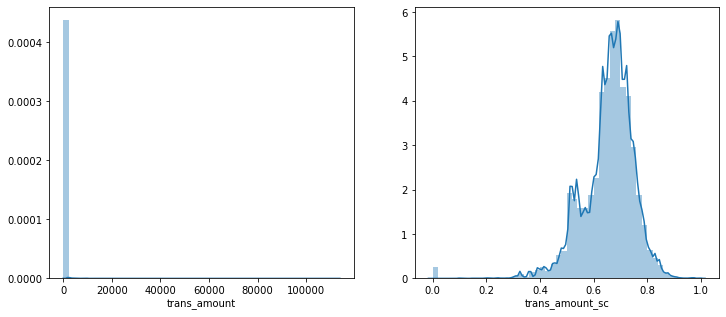

In [30]:
fig, ax=plt.subplots(ncols=2, figsize=(12,5))
sns.distplot(trans_df.trans_amount, ax=ax[0])
sns.distplot(trans_df.trans_amount_sc, ax=ax[1]);

In [31]:
trans_df=trans_df.set_index(['user_id']).sort_values('record_date', ascending=True)

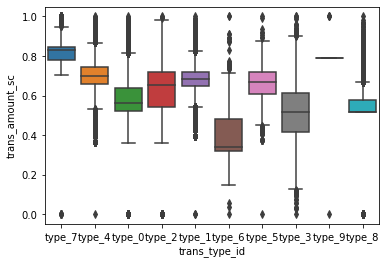

In [32]:
sns.boxplot(y='trans_amount_sc', data=trans_df,x='trans_type_id')

In [33]:
trans_df['next_trans'] = trans_df['record_date'].groupby("user_id").shift(-1)
trans_df

,record_date,cardholderpresence,trans_amount,trans_id,trans_state,trans_type_id,trans_amount_sc,next_trans
user_id,,,,,,,,
user_375,2019-01-02 07:09:41.673000+00:00,NaN,5.00,transaction_594289,COMPLETED,type_7,0.829164,2019-07-02 04:59:06.620000+00:00
user_657,2019-01-02 16:32:22.172000+00:00,NaN,5.00,transaction_9393,COMPLETED,type_7,0.829164,2020-01-15 11:26:30.226000+00:00
user_46,2019-01-02 20:36:25.868000+00:00,NaN,42.55,transaction_545571,COMPLETED,type_4,0.692868,2019-01-27 18:36:59.351000+00:00
user_472,2019-01-02 21:38:32.797000+00:00,NaN,8.51,transaction_545576,COMPLETED,type_4,0.629387,2019-01-02 21:40:02.619000+00:00
user_472,2019-01-02 21:40:02.619000+00:00,NaN,5.11,transaction_545575,COMPLETED,type_7,0.830334,2019-01-10 19:29:43.251000+00:00
...,...,...,...,...,...,...,...,...
user_6877,2020-05-14 04:12:18.738000+00:00,NaN,33.07,transaction_755964,COMPLETED,type_4,0.682927,2020-05-14 07:04:08.838000+00:00
user_1102,2020-05-14 06:51:17.491000+00:00,NaN,100.00,transaction_181734,COMPLETED,type_2,0.724265,2020-05-14 17:36:51.926000+00:00
user_6877,2020-05-14 07:04:08.838000+00:00,NaN,33.07,transaction_767914,COMPLETED,type_4,0.682927,NaT


In [34]:
trans_df['time_diff']=(trans_df['next_trans']-trans_df['record_date']).dt.days

In [35]:
trans_df.sort_values(['user_id','record_date'] )

,record_date,cardholderpresence,trans_amount,trans_id,trans_state,trans_type_id,trans_amount_sc,next_trans,time_diff
user_id,,,,,,,,,
user_0,2019-01-16 23:24:18.666000+00:00,NaN,39.77,transaction_237281,COMPLETED,type_4,0.690203,2019-01-16 23:30:38.475000+00:00,0.0
user_0,2019-01-16 23:30:38.475000+00:00,NaN,1.99,transaction_233630,COMPLETED,type_7,0.779640,2019-01-17 01:39:17.613000+00:00,0.0
user_0,2019-01-17 01:39:17.613000+00:00,NaN,37.78,transaction_233675,COMPLETED,type_2,0.685993,2019-01-17 01:52:38.943000+00:00,0.0
user_0,2019-01-17 01:52:38.943000+00:00,NaN,5.66,transaction_546121,COMPLETED,type_0,0.610763,2019-01-17 07:49:06.142000+00:00,0.0
user_0,2019-01-17 07:49:06.142000+00:00,NaN,4.26,transaction_545586,COMPLETED,type_0,0.599601,2019-01-18 11:02:38.350000+00:00,1.0
...,...,...,...,...,...,...,...,...,...
user_9999,2020-03-25 17:33:46.384000+00:00,NaN,0.49,transaction_950841,COMPLETED,type_0,0.514654,2020-04-20 01:29:10.364000+00:00,25.0
user_9999,2020-04-20 01:29:10.364000+00:00,NaN,34.04,transaction_1011789,COMPLETED,type_4,0.684067,2020-04-20 01:36:37.861000+00:00,0.0
user_9999,2020-04-20 01:36:37.861000+00:00,TRUE,16.54,transaction_1011546,COMPLETED,type_1,0.717181,2020-04-20 01:36:37.989000+00:00,0.0


In [36]:
trans_df['last_date'] = trans_df.groupby('user_id')['record_date'].transform('max')

In [37]:
trans_df['record_date'].max()

Timestamp('2020-05-14 21:38:40.194000+0000', tz='UTC')

In [38]:
trans_df['last_trans'] = (trans_df['record_date'].max() - trans_df['last_date']).dt.days

In [39]:
trans_df

,record_date,cardholderpresence,trans_amount,trans_id,trans_state,trans_type_id,trans_amount_sc,next_trans,time_diff,last_date,last_trans
user_id,,,,,,,,,,,
user_375,2019-01-02 07:09:41.673000+00:00,NaN,5.00,transaction_594289,COMPLETED,type_7,0.829164,2019-07-02 04:59:06.620000+00:00,180.0,2019-08-23 08:57:13.994000+00:00,265
user_657,2019-01-02 16:32:22.172000+00:00,NaN,5.00,transaction_9393,COMPLETED,type_7,0.829164,2020-01-15 11:26:30.226000+00:00,377.0,2020-05-07 17:26:06.194000+00:00,7
user_46,2019-01-02 20:36:25.868000+00:00,NaN,42.55,transaction_545571,COMPLETED,type_4,0.692868,2019-01-27 18:36:59.351000+00:00,24.0,2019-02-09 17:22:23.152000+00:00,460
user_472,2019-01-02 21:38:32.797000+00:00,NaN,8.51,transaction_545576,COMPLETED,type_4,0.629387,2019-01-02 21:40:02.619000+00:00,0.0,2020-05-06 11:34:37.631000+00:00,8
user_472,2019-01-02 21:40:02.619000+00:00,NaN,5.11,transaction_545575,COMPLETED,type_7,0.830334,2019-01-10 19:29:43.251000+00:00,7.0,2020-05-06 11:34:37.631000+00:00,8
...,...,...,...,...,...,...,...,...,...,...,...
user_6877,2020-05-14 04:12:18.738000+00:00,NaN,33.07,transaction_755964,COMPLETED,type_4,0.682927,2020-05-14 07:04:08.838000+00:00,0.0,2020-05-14 07:04:08.838000+00:00,0
user_1102,2020-05-14 06:51:17.491000+00:00,NaN,100.00,transaction_181734,COMPLETED,type_2,0.724265,2020-05-14 17:36:51.926000+00:00,0.0,2020-05-14 21:38:40.194000+00:00,0
user_6877,2020-05-14 07:04:08.838000+00:00,NaN,33.07,transaction_767914,COMPLETED,type_4,0.682927,NaT,NaN,2020-05-14 07:04:08.838000+00:00,0


In [40]:
trans_month = trans_df.groupby(['user_id', trans_df['record_date'].dt.year,trans_df['record_date'].dt.month]).\
       agg({'trans_id':'count', 'trans_amount_sc':['mean','median','std'], 
            'time_diff':['mean','median','std'],
            'last_trans':['max'] })

In [41]:
trans_month.columns=['count','mean_amount', 'median_amount', 'std_amount', 
                            'mean_days','median_days','std_days', 'last_trans_days']

In [42]:
trans_month.index.names=['user_id', 'trans_yr', 'trans_mo']

In [43]:
trans_month.head(30)

count  mean_amount  median_amount  std_amount  \
user_id trans_yr trans_mo                                                  
user_0  2019     1            10     0.651143       0.645195    0.059471   
                 2            10     0.634493       0.705072    0.155264   
                 3            24     0.664821       0.677453    0.073461   
                 4             6     0.709085       0.705072    0.064400   
                 5            16     0.631191       0.630519    0.039976   
                 6            24     0.657154       0.667275    0.055954   
                 7            28     0.685061       0.694603    0.049853   
                 8            17     0.647944       0.632883    0.075342   
                 9             2     0.661801       0.661801    0.001488   
                 10           21     0.655638       0.662853    0.076357   
                 11           10     0.634961       0.626037    0.064005   
                 12            9     0.634800       0.623124    0.058378   
        2020     1             2     0.586663       0.586663    0.023984   
                 2             9     0.663257       0.685993    0.064437   
                 3            14     0.609690       0.593764    0.069868   
                 4            43     0.692738       0.688012    0.054844   
                 5             1     0.683285       0.683285         NaN   
user_1  2019     3             7     0.720843       0.722222    0.069015   
                 4            18     0.732863       0.742565    0.043295   
                 5             5     0.713199       0.726572    0.055715   
                 6            11     0.672361       0.676273    0.035107   
                 7             4     0.704706       0.713181    0.042222   
                 8             3     0.708333       0.733764    0.049092   
                 9             7     0.697501       0.699187    0.050873   
                 11            5     0.683652       0.679084    0.017510   
                 12            6     0.700117       0.713186    0.041933   
        2020     1             1     0.759557       0.759557         NaN   
                 2             6     0.744793       0.749928    0.034925   
user_10 2019     1             7     0.657523       0.642501    0.056509   
                 2            14     0.678868       0.685009    0.043886   

                           mean_days  median_days   std_days  last_trans_days  
user_id trans_yr trans_mo                                                      
user_0  2019     1          1.400000          0.0   4.087923               12  
                 2          2.500000          0.0   5.892557               12  
                 3          1.291667          0.0   4.666990               12  
                 4          3.833333          0.5   6.400521               12  
                 5          1.687500          0.0   5.300550               12  
                 6          1.125000          0.0   2.251811               12  
                 7          0.928571          0.0   1.942289               12  
                 8          1.823529          0.0   7.011021               12  
                 9         15.000000         15.0  21.213203               12  
                 10         0.857143          0.0   2.007130               12  
                 11         4.000000          1.0   6.863753               12  
                 12         4.555556          1.0  12.176936               12  
        2020     1          2.500000          2.5   3.535534               12  
                 2          4.111111          0.0   7.817360               12  
                 3          1.285714          0.0   1.898525               12  
                 4          0.418605          0.0   1.561936               12  
                 5               NaN          NaN        NaN               12  
user_1  2019     3          3.857143          0.0  10.205041              

In [44]:
idx = pd.IndexSlice
trans_3_month=trans_month.loc[idx[:, 2020,3:5], ['count', 'mean_amount', 'mean_days']].groupby('user_id').\
               agg({'count':['mean'], 'mean_amount':['mean'],'mean_days':['mean']})
trans_3_month

,count,mean_amount,mean_days
,mean,mean,mean
user_id,,,
user_0,19.333333,0.661904,0.852159
user_10,14.666667,0.613393,1.297619
user_100,2.666667,0.738866,10.666667
user_1002,9.000000,0.720195,1.000000
user_1003,2.500000,0.772758,14.000000
...,...,...,...
user_9994,9.666667,0.662506,1.683473
user_9995,12.333333,0.572313,4.301075


In [45]:
trans_3_month.columns=['count', 'amount', 'days']

In [46]:
trans_3_month

,count,amount,days
user_id,,,
user_0,19.333333,0.661904,0.852159
user_10,14.666667,0.613393,1.297619
user_100,2.666667,0.738866,10.666667
user_1002,9.000000,0.720195,1.000000
user_1003,2.500000,0.772758,14.000000
...,...,...,...
user_9994,9.666667,0.662506,1.683473
user_9995,12.333333,0.572313,4.301075
user_9996,25.000000,0.691703,0.840090


In [47]:
trans_month_past=trans_month.drop(trans_month.loc[idx[:, 2020,3:5], :].index)
trans_month_past

count  mean_amount  median_amount  std_amount  \
user_id   trans_yr trans_mo                                                  
user_0    2019     1            10     0.651143       0.645195    0.059471   
                   2            10     0.634493       0.705072    0.155264   
                   3            24     0.664821       0.677453    0.073461   
                   4             6     0.709085       0.705072    0.064400   
                   5            16     0.631191       0.630519    0.039976   
...                            ...          ...            ...         ...   
user_9999 2019     8             1     0.830229       0.830229         NaN   
                   10           11     0.591707       0.629387    0.111849   
                   11            2     0.596063       0.596063    0.130735   
                   12            1     0.448090       0.448090         NaN   
          2020     2             2     0.529884       0.529884    0.004994   

                             mean_days  median_days   std_days  \
user_id   trans_yr trans_mo                                      
user_0    2019     1          1.400000          0.0   4.087923   
                   2          2.500000          0.0   5.892557   
                   3          1.291667          0.0   4.666990   
                   4          3.833333          0.5   6.400521   
                   5          1.687500          0.0   5.300550   
...                                ...          ...        ...   
user_9999 2019     8         60.000000         60.0        NaN   
                   10         1.818182          0.0   2.857208   
                   11        18.500000         18.5  24.748737   
                   12        71.000000         71.0        NaN   
          2020     2         14.500000         14.5  20.506097   

                             last_trans_days  
user_id   trans_yr trans_mo                   
user_0    2019     1                      12  
                   2                      12  
                   3                      12  
                   4                      12  
                   5                      12  
...                                      ...  
user_9999 2019     8                       9  
                   10                      9  
                   11                      9  
                   12                      9  
          2020     2                       9  

[54872 rows x 8 columns]

In [48]:
trans=trans_month_past[['count', 'mean_amount', 'mean_days', 'last_trans_days']].groupby('user_id').\
                    agg({'count':['mean'], 'mean_amount':['mean'],'mean_days':['mean'],'last_trans_days':['max'] })

In [49]:
trans.columns=['count', 'amount', 'days', 'last_trans_days']
trans

,count,amount,days,last_trans_days
user_id,,,,
user_0,13.428571,0.651287,3.258101,12
user_1,6.636364,0.712539,7.097212,80
user_10,17.571429,0.658914,1.615844,8
user_100,5.363636,0.753812,14.946970,7
user_1000,5.750000,0.755613,10.144444,323
...,...,...,...,...
user_9995,43.166667,0.595391,0.369805,12
user_9996,22.142857,0.708998,0.924458,24
user_9997,4.000000,0.609678,13.775000,16


In [50]:
trans_user=pd.merge(trans[['count','amount','days', 'last_trans_days']], trans_3_month, on='user_id', how='outer', suffixes=('', '_last_3_months')).fillna(0)
trans_user=pd.merge(trans_user, user_df[['user_id','user_days']], on='user_id', how='inner', suffixes=('', '_user')).fillna(0)

In [51]:
trans_user

,user_id,count,amount,days,last_trans_days,count_last_3_months,amount_last_3_months,days_last_3_months,user_days
0,user_0,13.428571,0.651287,3.258101,12.0,19.333333,0.661904,0.852159,487
1,user_1,6.636364,0.712539,7.097212,80.0,0.000000,0.000000,0.000000,471
2,user_10,17.571429,0.658914,1.615844,8.0,14.666667,0.613393,1.297619,496
3,user_100,5.363636,0.753812,14.946970,7.0,2.666667,0.738866,10.666667,485
4,user_1000,5.750000,0.755613,10.144444,323.0,0.000000,0.000000,0.000000,494
...,...,...,...,...,...,...,...,...,...
9411,user_9692,0.000000,0.000000,0.000000,0.0,7.000000,0.749063,1.500000,309
9412,user_9714,0.000000,0.000000,0.000000,0.0,1.000000,0.629387,0.000000,305
9413,user_9741,0.000000,0.000000,0.000000,0.0,3.000000,0.673510,3.555556,306
9414,user_9893,0.000000,0.000000,0.000000,0.0,1.000000,0.654009,0.000000,256


In [52]:
trans_user.to_csv('../data/trans_user.csv', index = True)